<a href="https://colab.research.google.com/github/mikeboyle321/Macromolecular_Engineering_Nanoparticle_Transport/blob/main/Worked_Example_DLVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extended DLVO - colloid interactions with a substrate in electrolyte solutions.

This notebook walks through the analysis of a PS Nanoparticle Interacting with a silica substrate as a function of distance from the substrate using an extended DLVO model adapted from 

Handol Lee, Doris Segets, Sebastian Süß, Wolfgang Peukert, Sheng-Chieh Chen, David Y.H. Pui,
Liquid filtration of nanoparticles through track-etched membrane filters under unfavorable and different ionic strength conditions: Experiments and modeling,
Journal of Membrane Science,
Volume 524,
2017,
Pages 682-690,
ISSN 0376-7388,
https://doi.org/10.1016/j.memsci.2016.11.023.
(https://www.sciencedirect.com/science/article/pii/S0376738816312352)


In [54]:
# Import key python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider, RadioButtons, FloatText, IntText
# set font size for plots globally
plt.rcParams.update({'font.size': 14})

## First we need to define some key constants

In [77]:
kb = 1.38064852E-23 # J/K, boltzmann constant
lambda_char = 100*1E-9 # m, 100 nm characteristic retardation wavelength ~ ionization wavelength
e_0 = 8.85418782E-12 # F/m
e_r = 78.4 # relative permittivity of water
e_coulomb = 1.602176634 # C 
T = 298 # K
Na = 6.022E23 #/mol, Avogadro

## Plot the VdW interaction potential for varying separation particle sizes
* Van der Waals interaction constants from Israelachvili, J.N., Intermolecular and Surface Forces, Third Edition 2011


A_eff = 1.0980904698146341e-21 J


Text(0, 0.5, '$\\frac{\\phi_{VdW}}{k_{b}T}$')

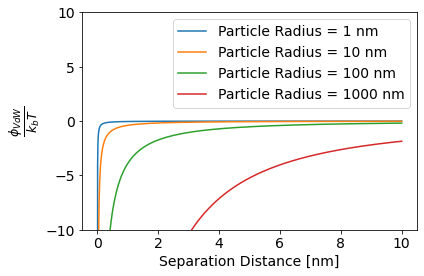

In [80]:
# Use combination 
A_ps = np.mean([6.6E-20, 7.9E-20])  # J
A_h2o = np.mean([3.7E-20, 5.5E-20]) # J
A_sio2 = np.mean([5E-20, 6E-20]) # J
A_eff = (np.sqrt(A_ps) - np.sqrt(A_h2o))*(np.sqrt(A_sio2) - np.sqrt(A_h2o)) # J
print(f'A_eff = {A_eff} J')

# define constants
r_np = [1,10,100, 1000] # differnt parictle diameters,  nm
h = np.linspace(0.001, 10, 1000)*1E-9 # separation distance range in m
kT = kb*T
for i in r_np:
  r_nm = i*1E-9
  phi_vdw = (-A_eff*r_nm*(1 + 14*h/lambda_char)**(-1))/(6*h)
  plt.plot(h*1E9, phi_vdw/kT, label = ('Particle Radius = ' + str(i) + ' nm'))
  plt.legend()
plt.ylim([-10,10])
plt.xlabel('Separation Distance [nm]')
plt.ylabel(r'$\frac{\phi_{VdW}}{k_{b}T}$', fontsize=18)

# Plot the Electric Double Layer ion concentration profile for varying salt concentration

In [ ]:
r_np = 100 # nm
psi_s = -50 # mV
psi_p = -50 # mV
z = 1 # salt valency - 1 for monovalent salt like NaCl
c_salt = [0.001, 0.01, 0.1, 1] # concentration of salt in the bulk soltuion in mol/L
h = np.linspace(0.001, 10, 1000)*1E-9 # separation distance range in m
kT = kb*T
for i in c_salt:
  kappa = np.sqrt((i*e))
  plt.plot(h*1E9, kappa, label = ('Particle Radius = ' + str(i) + ' nm'))
  plt.legend()
plt.ylim([-10,10])
plt.xlabel('Separation Distance [nm]')
plt.ylabel(r'$\frac{\phi_{VdW}}{k_{b}T}$', fontsize=18)
k_debye = np.sqrt(())

# Interactively plot the competition between all of them, with option to change any parameters

In [ ]:
# define constants
a = [1,10,100] # differnt parictle diameters,  nm
h = np.linspace(0.001, 10) # separation distance range in nm
kT = kb*T
for i in a:
  phi_vdw = (-A_eff*i*(1 + 14*h/lambda_char)**(-1))/(6*h)
  plt.plot(h, phi_vdw/kT, label = ('Particle Radius = ' + str(i) + ' nm'))
  plt.legend()
plt.ylim([-3,3])
plt.xlabel('Separation Distance [nm]')
plt.ylabel(r'$\frac{\phi_{VdW}}{k_{b}T}$')